In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from warnings import filterwarnings
filterwarnings("ignore")
import os
from PIL import Image


In [4]:
#directory containing data

train_dir = "C:/Users/hsh/Project 4 Github/Gender Classification/Training"
valid_dir = "C:/Users/hsh/Project 4 Github/Gender Classification/Validation"


In [5]:
#displays a random sample of 10 images from a given directory using the matplotlib library

def show_image(dir):
    plt.figure(figsize=(12,7))
    for i in range(10):
        plt.subplot(2,5,i+1)
        img = random.choice(os.listdir(dir))
        img = load_img(os.path.join(dir,img))
        plt.subplots_adjust(hspace=0.2)
        x =dir.split("/")[-1]
        if x == "male":
            plt.suptitle("Male Images",fontsize=15)
        else:
            plt.suptitle("Female Images",fontsize=15)
        plt.imshow(img)
    plt.tight_layout()

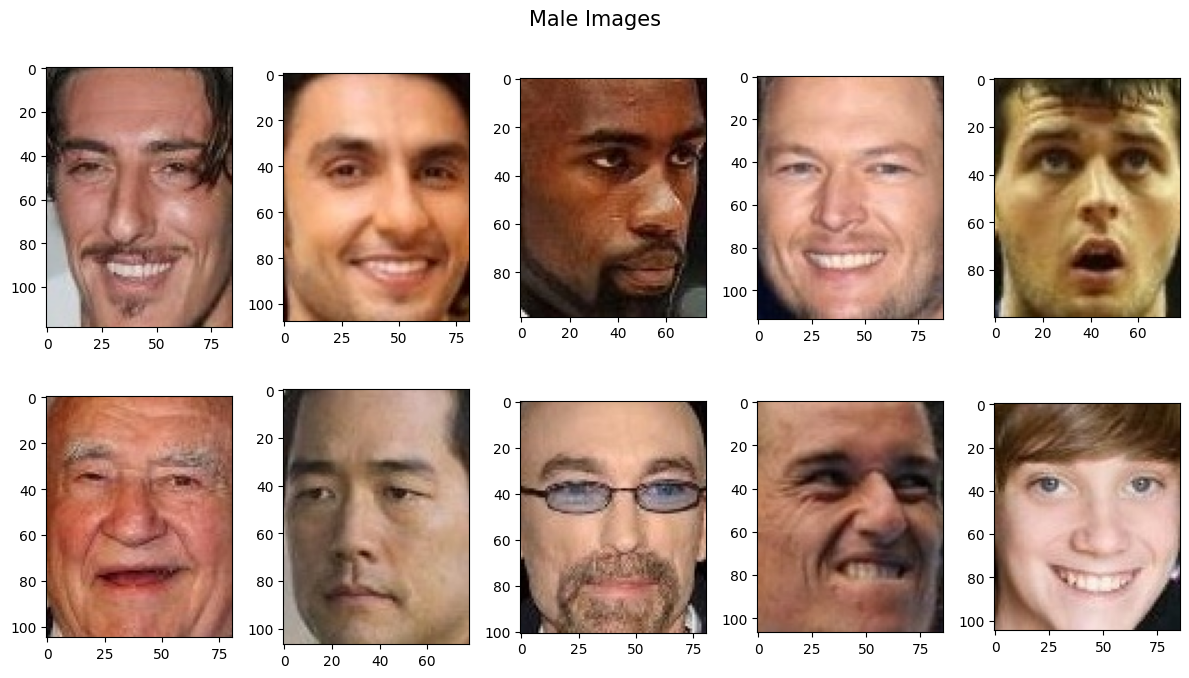

In [6]:
#display random images of males
show_image("C:/Users/hsh/Project 4 Github/Gender Classification/Training/male")

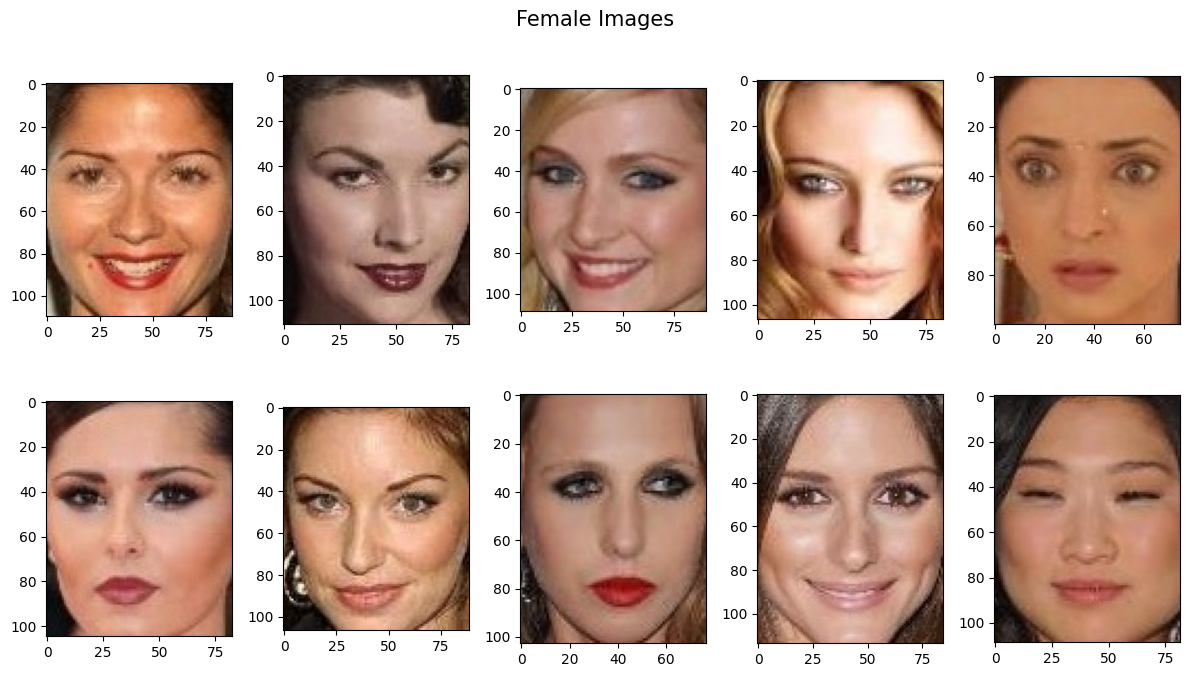

In [7]:
#displays random images of females
show_image("C:/Users/hsh/Project 4 Github/Gender Classification/Training/female")

In [8]:
# Set the target height and width for the images
height = 150
width = 150

# Define the data generators for training and validation data
train_datagen =  ImageDataGenerator(rescale = 1/255.0,rotation_range=45,height_shift_range=0.2,shear_range=0.2,
                              zoom_range=0.2,validation_split=0.2,horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale = 1/255.0)

# Load the training data using the flow_from_directory function
train_data = train_datagen.flow_from_directory(directory = train_dir,target_size=(height,width),
                                               class_mode = "categorical",batch_size=32,subset="training")

# Load the validation data using the flow_from_directory function
val_data = train_datagen.flow_from_directory(directory = train_dir,target_size=(height,width),
                                               class_mode = "categorical",batch_size=32,subset="validation")

Found 37608 images belonging to 2 classes.
Found 9401 images belonging to 2 classes.


Model Building

In [9]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2


# Load the MobileNetV2 model pretrained on ImageNet without the top layer
mobilenet = MobileNetV2(weights = "imagenet",include_top = False,input_shape=(height,width,3))

In [10]:
# Create an instance of the MobileNetV2 model
model = MobileNetV2(input_shape=None,
                    alpha=1.0,
                    include_top=True,
                    weights='imagenet',
                    input_tensor=None,
                    pooling=None,
                    classes=1000,
                    classifier_activation='softmax'
)

In [11]:
for layer in mobilenet.layers:
    layer.trainable = False

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPool2D,BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [13]:
model = Sequential()
model.add(mobilenet)
model.add(Dense(128,activation="relu"))
#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(2,activation = "softmax"))

model.compile(optimizer=Adam(lr=0.001),loss = "categorical_crossentropy",metrics =["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 dense (Dense)               (None, 5, 5, 128)         163968    
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 6402      
                                                                 
Total params: 2,428,354
Trainable params: 170,370
Non-trainable params: 2,257,984
_________________________________________________________________


In [14]:
model.compile(optimizer=Adam(lr=0.001),loss = "categorical_crossentropy",metrics =["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 dense (Dense)               (None, 5, 5, 128)         163968    
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 6402      
                                                                 
Total params: 2,428,354
Trainable params: 170,370
Non-trainable params: 2,257,984
_________________________________________________________________


In [15]:
checkpoint = ModelCheckpoint("Gender.h5",monitor = "val_accuracy",save_best_only = True,verbose=1)
earlystop = EarlyStopping(monitor='val_acc',patience=5,verbose=1)

In [16]:
batch_size = 32
history = model.fit_generator(train_data,steps_per_epoch = len(train_data)// batch_size,epochs=15,
                              validation_data = val_data,validation_steps = len(val_data)//batch_size,
                              callbacks = [checkpoint,earlystop],verbose=1)

Epoch 1/15
36/36 [==============================] - ETA: 0s - loss: 0.7584 - accuracy: 0.6979
Epoch 1: val_accuracy improved from -inf to 0.71875, saving model to Gender.h5


36/36 [==============================] - 53s 1s/step - loss: 0.7584 - accuracy: 0.6979 - val_loss: 0.6270 - val_accuracy: 0.7188
Epoch 2/15
36/36 [==============================] - ETA: 0s - loss: 0.4707 - accuracy: 0.7951
Epoch 2: val_accuracy improved from 0.71875 to 0.79167, saving model to Gender.h5


36/36 [==============================] - 41s 1s/step - loss: 0.4707 - accuracy: 0.7951 - val_loss: 0.4640 - val_accuracy: 0.7917
Epoch 3/15
36/36 [==============================] - ETA: 0s - loss: 0.4321 - accuracy: 0.8047
Epoch 3: val_accuracy improved from 0.79167 to 0.86458, saving model to Gender.h5


36/36 [==============================] - 39s 1s/step - loss: 0.4321 - accuracy: 0.8047 - val_loss: 0.3350 - val_accuracy: 0.8646
Epoch 4/15
36/36 [==============================] - ETA: 0s - loss: 0.3864 - accuracy: 0.8411
Epoch 4: val_accuracy did not improve from 0.86458


36/36 [==============================] - 57s 2s/step - loss: 0.3864 - accuracy: 0.8411 - val_loss: 0.4196 - val_accuracy: 0.8194
Epoch 5/15
36/36 [==============================] - ETA: 0s - loss: 0.4360 - accuracy: 0.8047
Epoch 5: val_accuracy did not improve from 0.86458


36/36 [==============================] - 59s 2s/step - loss: 0.4360 - accuracy: 0.8047 - val_loss: 0.3703 - val_accuracy: 0.8299
Epoch 6/15
36/36 [==============================] - ETA: 0s - loss: 0.3659 - accuracy: 0.8464
Epoch 6: val_accuracy improved from 0.86458 to 0.87847, saving model to Gender.h5


36/36 [==============================] - 45s 1s/step - loss: 0.3659 - accuracy: 0.8464 - val_loss: 0.2924 - val_accuracy: 0.8785
Epoch 7/15
36/36 [==============================] - ETA: 0s - loss: 0.3627 - accuracy: 0.8498
Epoch 7: val_accuracy did not improve from 0.87847


36/36 [==============================] - 36s 997ms/step - loss: 0.3627 - accuracy: 0.8498 - val_loss: 0.3451 - val_accuracy: 0.8333
Epoch 8/15
36/36 [==============================] - ETA: 0s - loss: 0.3965 - accuracy: 0.8290
Epoch 8: val_accuracy did not improve from 0.87847


36/36 [==============================] - 40s 1s/step - loss: 0.3965 - accuracy: 0.8290 - val_loss: 0.4117 - val_accuracy: 0.8194
Epoch 9/15
36/36 [==============================] - ETA: 0s - loss: 0.3711 - accuracy: 0.8455
Epoch 9: val_accuracy improved from 0.87847 to 0.88542, saving model to Gender.h5


36/36 [==============================] - 44s 1s/step - loss: 0.3711 - accuracy: 0.8455 - val_loss: 0.2820 - val_accuracy: 0.8854
Epoch 10/15
36/36 [==============================] - ETA: 0s - loss: 0.3409 - accuracy: 0.8628
Epoch 10: val_accuracy did not improve from 0.88542


36/36 [==============================] - 46s 1s/step - loss: 0.3409 - accuracy: 0.8628 - val_loss: 0.3494 - val_accuracy: 0.8333
Epoch 11/15
36/36 [==============================] - ETA: 0s - loss: 0.3474 - accuracy: 0.8403
Epoch 11: val_accuracy did not improve from 0.88542


36/36 [==============================] - 43s 1s/step - loss: 0.3474 - accuracy: 0.8403 - val_loss: 0.3185 - val_accuracy: 0.8646
Epoch 12/15
36/36 [==============================] - ETA: 0s - loss: 0.3647 - accuracy: 0.8438
Epoch 12: val_accuracy improved from 0.88542 to 0.90278, saving model to Gender.h5


36/36 [==============================] - 38s 1s/step - loss: 0.3647 - accuracy: 0.8438 - val_loss: 0.2336 - val_accuracy: 0.9028
Epoch 13/15
36/36 [==============================] - ETA: 0s - loss: 0.3712 - accuracy: 0.8307
Epoch 13: val_accuracy did not improve from 0.90278


36/36 [==============================] - 35s 980ms/step - loss: 0.3712 - accuracy: 0.8307 - val_loss: 0.2755 - val_accuracy: 0.8958
Epoch 14/15
36/36 [==============================] - ETA: 0s - loss: 0.3305 - accuracy: 0.8585
Epoch 14: val_accuracy did not improve from 0.90278


36/36 [==============================] - 36s 982ms/step - loss: 0.3305 - accuracy: 0.8585 - val_loss: 0.2930 - val_accuracy: 0.8785
Epoch 15/15
36/36 [==============================] - ETA: 0s - loss: 0.2946 - accuracy: 0.8715
Epoch 15: val_accuracy did not improve from 0.90278


36/36 [==============================] - 35s 961ms/step - loss: 0.2946 - accuracy: 0.8715 - val_loss: 0.3007 - val_accuracy: 0.8750


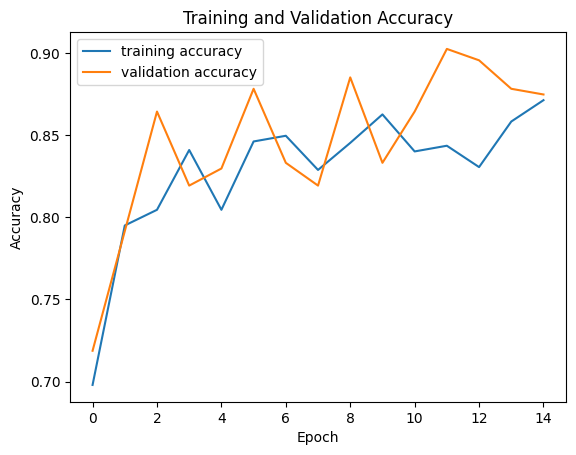

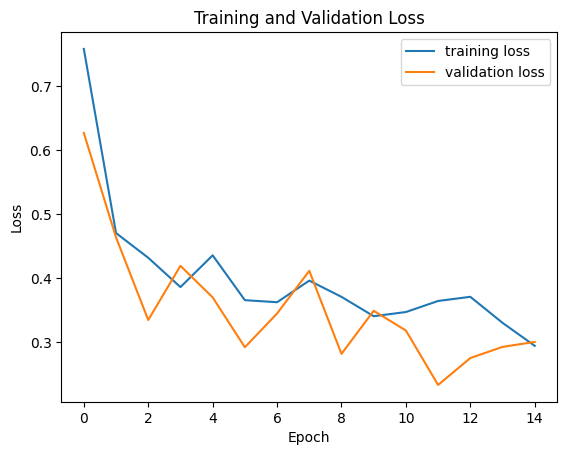

In [17]:
# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate_generator(val_data)

print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)


Validation Loss: 0.2968692481517792
Validation Accuracy: 0.8718221187591553


In [19]:

def checking(img):
    label = {0:"female",1:"male"} 
    image =cv2.imread(img)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    cascade = cv2.CascadeClassifier("C:/Users/hsh/Project 4 Github/Gender Classification/haarcascade_frontalface_default.xml")
    faces = cascade.detectMultiScale(gray,1.1,7)#1.1
    
    for x,y,w,h in faces:
        face = image[y:y+h,x:x+w]
        face = cv2.resize(face,(150,150))
        img_scaled = face/255.0
        reshape = np.reshape(img_scaled,(1,150,150,3))
        img = np.vstack([reshape])
        result = model.predict(img)
        
        if (result == 0).any():
            cv2.rectangle(image,(x-10,y),(x+w,y+h),(0,255,0),4)
            cv2.rectangle(image,(x-10,y-50),(x+w,y),(255,0,0),-1)
            cv2.putText(image,label[0],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),2)
            
        elif (result == 1).any():
            cv2.rectangle(image,(x-10,y),(x+w,y+h),(0,255,0),4)
            cv2.rectangle(image,(x-10,y-50),(x+w,y),(255,0,0),-1)
            cv2.putText(image,label[1],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),2)
            
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(label[result.argmax()])
    plt.show()
    cv2.destroyAllWindows()


1/1 [==============================] - 2s 2s/step


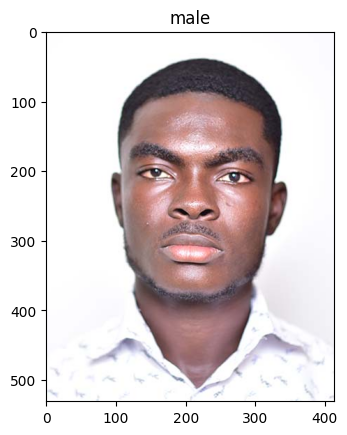

In [20]:
checking("C:/Users/hsh/Project 4 Github/Gender Classification/Passport Picture.jpg")

1/1 [==============================] - 0s 112ms/step


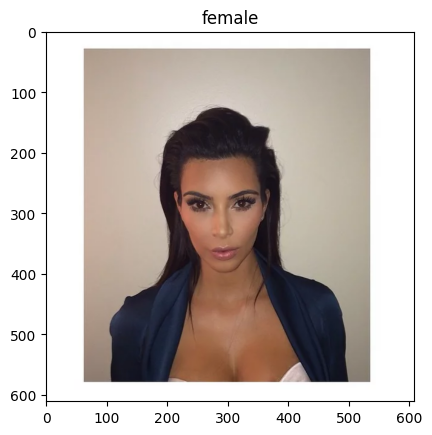

In [21]:
checking("C:/Users/hsh/Project 4 Github/Gender Classification/kim.jpg")

In [22]:

# Define the gender labels
labels = {0: "female", 1: "male"}

# Define the face detection function
def detect_face(img_path):
    # Load the image
    image = cv2.imread(img_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Load the face detection classifier
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    # If no faces are detected, return None
    if len(faces) == 0:
        return None
    
    # Extract the first face detected
    (x, y, w, h) = faces[0]
    
    # Crop the face and resize it to the required size for the model
    face = cv2.resize(image[y:y+h, x:x+w], (150, 150))
    
    # Scale the pixel values to the range [0, 1]
    face = face / 255.0
    
    # Reshape the image to match the input shape of the model
    face = np.reshape(face, (1, 150, 150, 3))
    
    # Return the cropped face image
    return face

# Define the function for displaying the image with the gender label
def display_image_with_gender(img_path):
    # Detect the face in the image
    face = detect_face(img_path)
    
    # If no face is detected, print an error message and return None
    if face is None:
        print("No face detected in the image.")
        return None
    
    # Get the gender prediction from the model
    prediction = model.predict(face)
    gender_label = labels[np.argmax(prediction)]
    
    # Load the image and convert it to RGB for display
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Draw the bounding box and gender label on the image
    (x, y, w, h) = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml").detectMultiScale(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), scaleFactor=1.1, minNeighbors=4)[0]
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(image, gender_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Display the image with the gender label
    plt.imshow(image)
    plt.show()


1/1 [==============================] - 0s 80ms/step


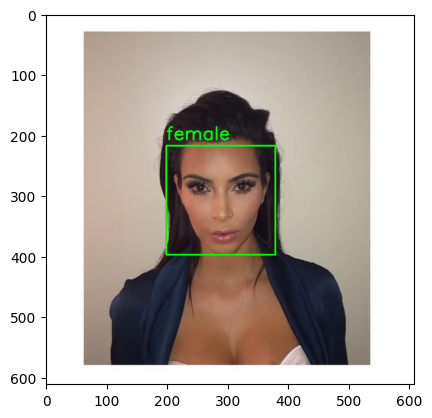

In [23]:
# Example usage
display_image_with_gender("C:/Users/hsh/Project 4 Github/Gender Classification/kim.jpg")

1/1 [==============================] - 0s 72ms/step


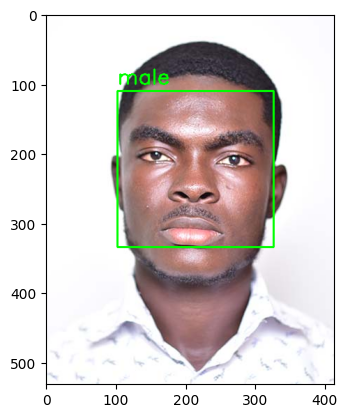

In [24]:
display_image_with_gender("C:/Users/hsh/Project 4 Github/Gender Classification/Passport Picture.jpg")

1/1 [==============================] - 0s 56ms/step


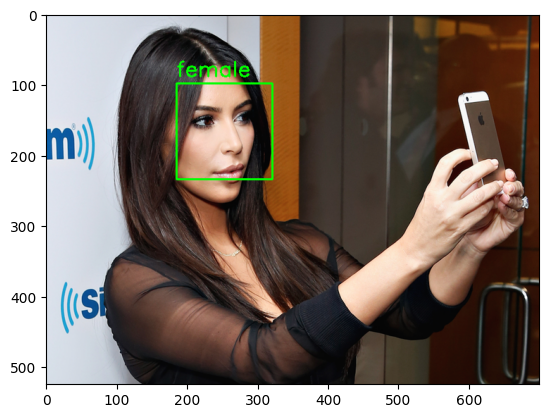

In [25]:
# Example usage
display_image_with_gender("C:/Users/hsh/Project 4 Github/Gender Classification/kim2.jpg")

1/1 [==============================] - 0s 192ms/step


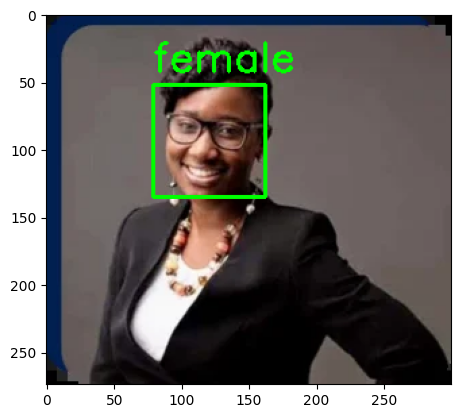

In [31]:
display_image_with_gender("C:/Users/hsh/Project 4 Github/Gender Classification/hr.jpg")